In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/wesad-main')

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [4]:
from sklearn.svm import SVC

In [5]:
from ae_feature_extractor import autoencoder
ae = autoencoder ()

## Chest and Wrist Physio modalities classification

In [6]:
# use chest and wrist features for classification
scores_all = []
cms = []
for sid in ae.ids:
    feat = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/test/feat_loso" + str(sid) + ".pkl"))

    y = feat[:,-1]
    x = feat[:,:-1]
    x = StandardScaler().fit_transform(x)

    y_test = feat_test[:,-1]
    x_test = feat_test[:,:-1]
    x_test = StandardScaler().fit_transform(x_test)

    clf = SVC(C = 0.8, gamma= 'auto', kernel='poly', degree=3)
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_all.append([sid, acc, precision, recall, f1])
    cms.append(cm)

subject  2
accuracy:  0.768033946251768
f1 score:  0.7642077468013151

subject  3
accuracy:  0.8175487465181058
f1 score:  0.8138431599245335

subject  4
accuracy:  0.8244803695150116
f1 score:  0.7516863070350946

subject  5
accuracy:  0.9418132611637348
f1 score:  0.9383952205387973

subject  6
accuracy:  0.9377838328792008
f1 score:  0.9386218563890986

subject  7
accuracy:  0.8262056414922657
f1 score:  0.7542769941055247

subject  8
accuracy:  0.7703804347826086
f1 score:  0.7198997032905662

subject  9
accuracy:  0.9726900318616295
f1 score:  0.9724987580636287

subject  10
accuracy:  0.8036890645586298
f1 score:  0.7489667897945457

subject  11
accuracy:  0.8518185900314325
f1 score:  0.8431277716652198

subject  13
accuracy:  0.8337825696316262
f1 score:  0.7713513451053011

subject  14
accuracy:  0.7732375392905254
f1 score:  0.7410171017282683

subject  15
accuracy:  0.8329601433049709
f1 score:  0.7638545921080134

subject  16
accuracy:  0.9860423232778028
f1 score:  0.98600

In [7]:
np.array(scores_all)[:,1].mean() #accuracy

np.float64(0.8418424646050673)

In [8]:
np.array(scores_all)[:,1].std()

np.float64(0.08129508827557554)

In [9]:
np.array(scores_all)[:,2].mean() #precision

np.float64(0.8158017198091407)

In [10]:
np.array(scores_all)[:,2].std()

np.float64(0.10030484547792369)

In [11]:
np.array(scores_all)[:,3].mean() #recall

np.float64(0.8418424646050673)

In [12]:
np.array(scores_all)[:,3].std()

np.float64(0.08129508827557554)

In [13]:
np.array(scores_all)[:,4].mean() #f1-score

np.float64(0.8117974555716402)

In [14]:
np.array(scores_all)[:,4].std()

np.float64(0.09665204584273676)

### Confusion Matrices per subject and for all subjects combined

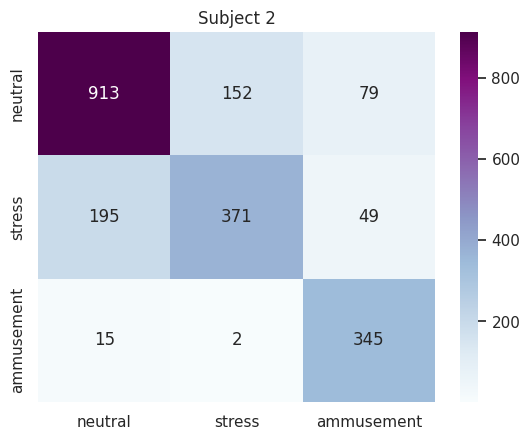

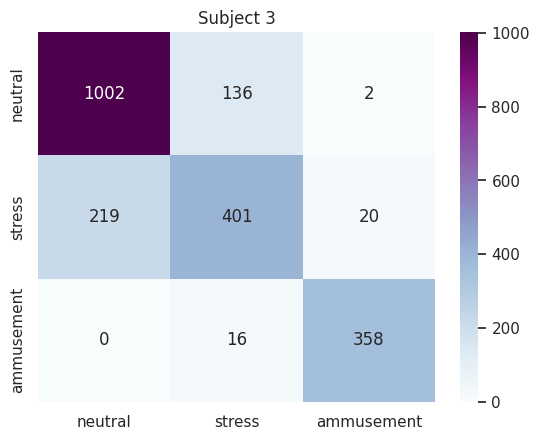

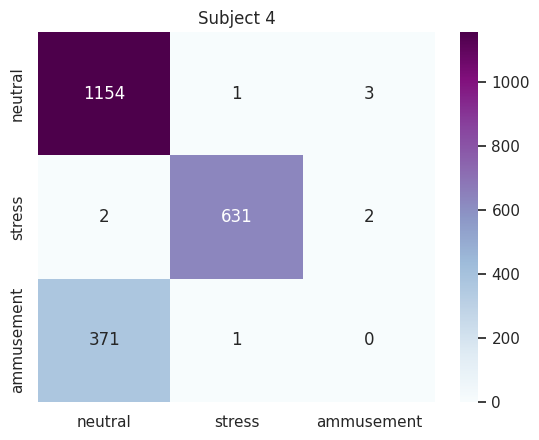

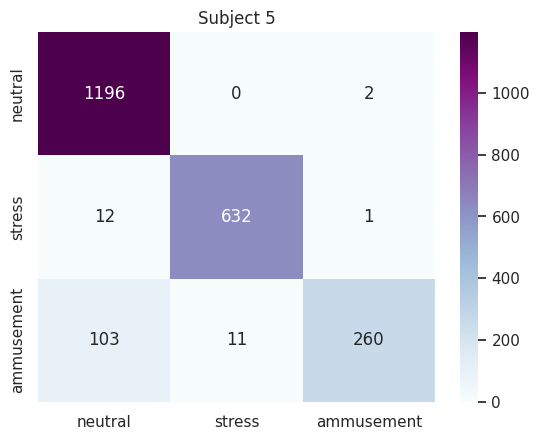

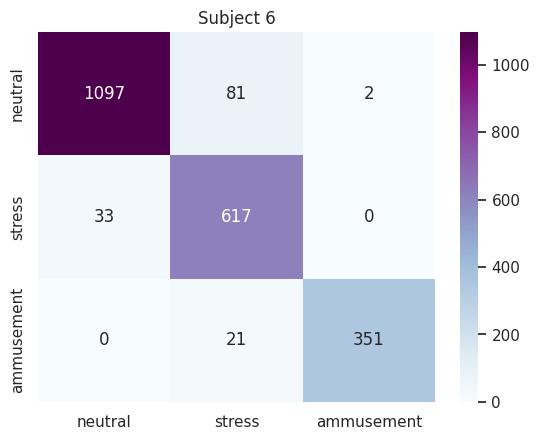

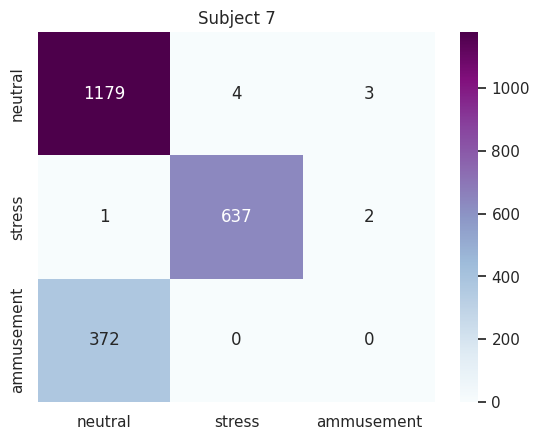

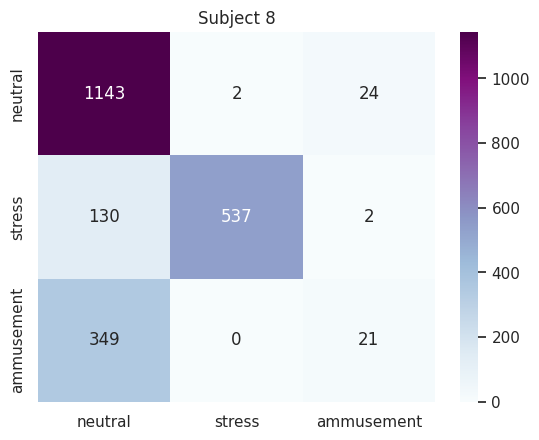

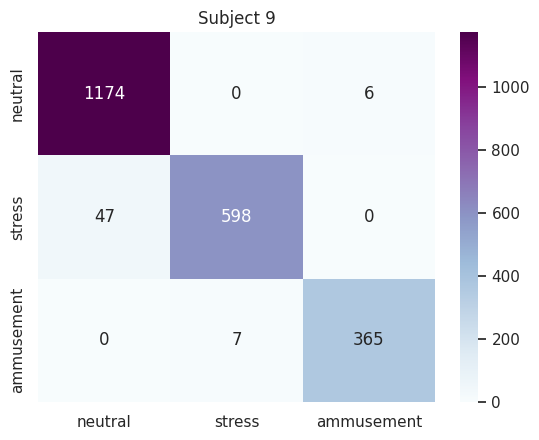

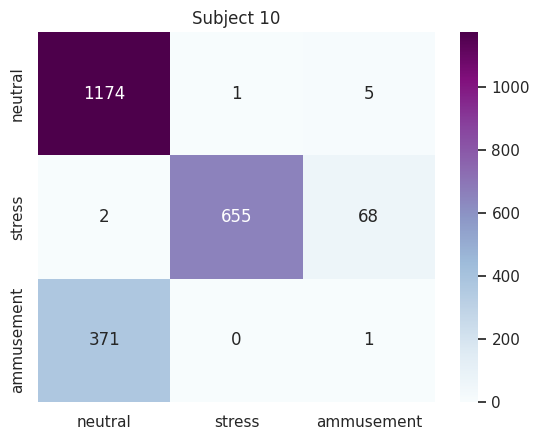

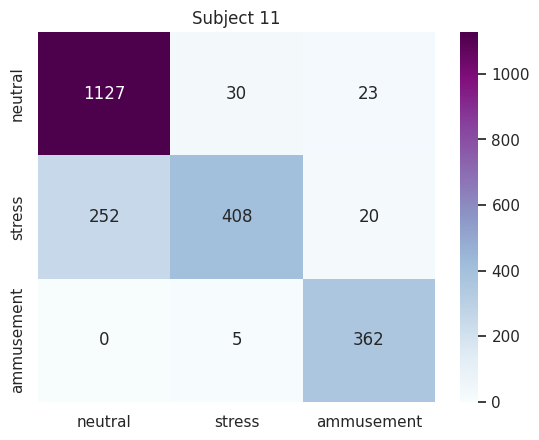

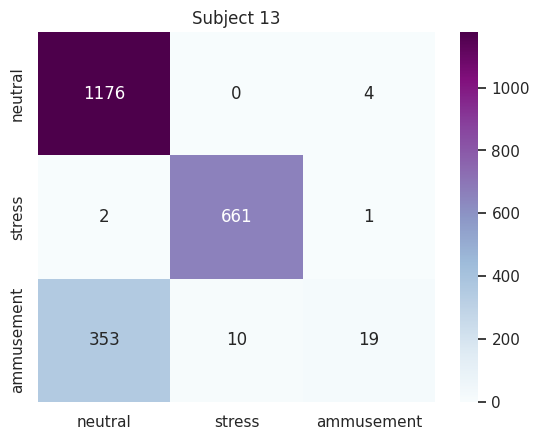

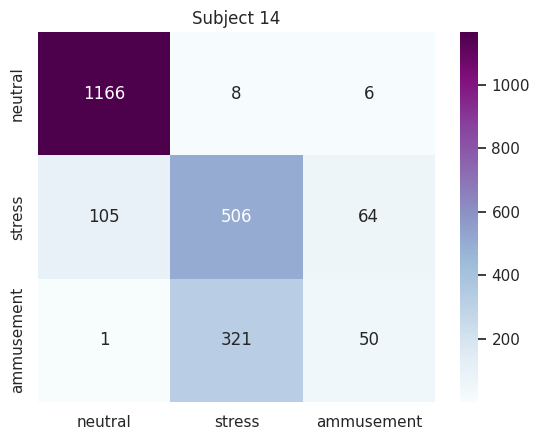

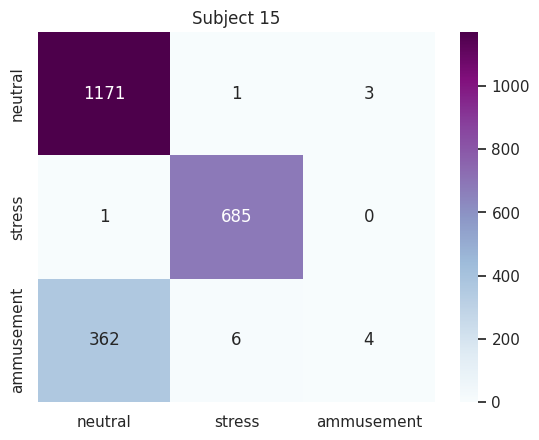

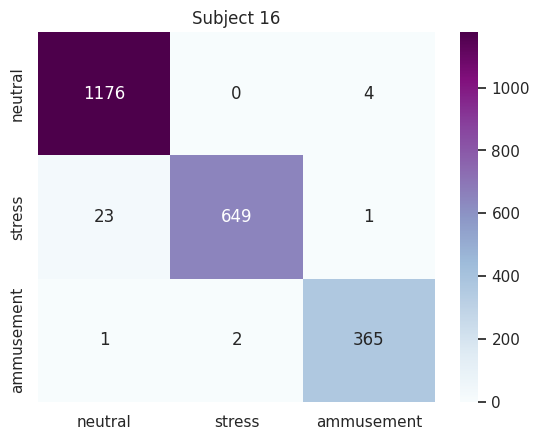

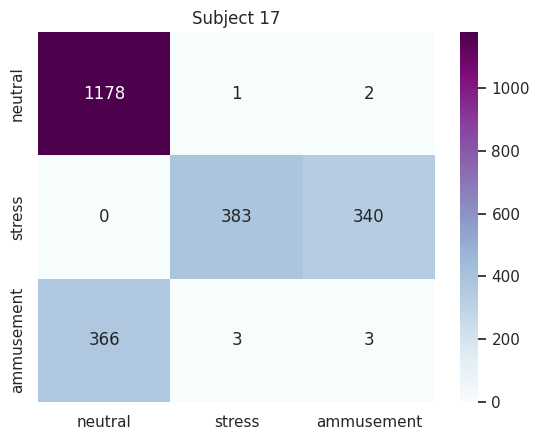

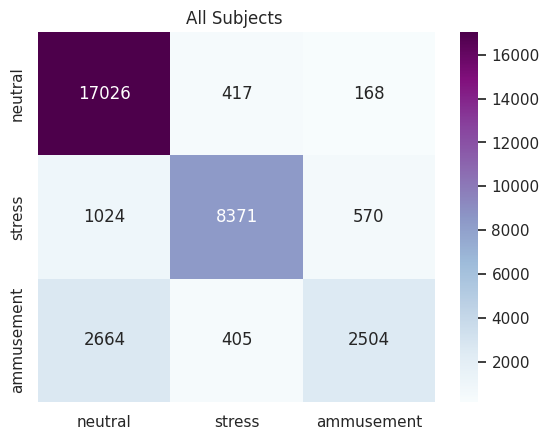

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_all)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()

df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()


## Chest only physio modalities classification

In [16]:
# use chest only features for classification
scores_c = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/test/feat_loso" + str(sid) + ".pkl"))

    y = feat[:,-1]
    x = feat[:,:80]
    x = StandardScaler().fit_transform(x)

    y_test = feat_test[:,-1]
    x_test = feat_test[:,:80]
    x_test = StandardScaler().fit_transform(x_test)

    clf = SVC(C = 0.8, gamma= 'auto', kernel='poly', degree=3)
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_c.append([sid, acc, precision, recall, f1])
    cms.append(cm)

subject  2
accuracy:  0.6157472890146157
f1 score:  0.6024707889456979

subject  3
accuracy:  0.7678737233054782
f1 score:  0.7581940186204249

subject  4
accuracy:  0.8060046189376443
f1 score:  0.743730996843472

subject  5
accuracy:  0.9093369418132612
f1 score:  0.9071117292250146

subject  6
accuracy:  0.8487738419618529
f1 score:  0.8423368483972866

subject  7
accuracy:  0.8207461328480437
f1 score:  0.7523301933057602

subject  8
accuracy:  0.572463768115942
f1 score:  0.531133894551316

subject  9
accuracy:  0.7501137915339099
f1 score:  0.7220268058277093

subject  10
accuracy:  0.8028107158541942
f1 score:  0.747828826150836

subject  11
accuracy:  0.9735069600359227
f1 score:  0.9736002931538037

subject  13
accuracy:  0.8328840970350404
f1 score:  0.7778019433988702

subject  14
accuracy:  0.7898518185900314
f1 score:  0.7685792596992251

subject  15
accuracy:  0.8316166592028661
f1 score:  0.7607013341119988

subject  16
accuracy:  0.9752363800090049
f1 score:  0.97499721

In [17]:
np.array(scores_c)[:,1].mean() #accuracy

np.float64(0.8087257263115046)

In [18]:
np.array(scores_c)[:,1].std()

np.float64(0.10553204669021193)

In [19]:
np.array(scores_c)[:,2].mean() #precision

np.float64(0.7703245589171537)

In [20]:
np.array(scores_c)[:,2].std()

np.float64(0.12126275444246838)

In [21]:
np.array(scores_c)[:,3].mean() #recall

np.float64(0.8087257263115046)

In [22]:
np.array(scores_c)[:,3].std()

np.float64(0.10553204669021193)

In [23]:
np.array(scores_c)[:,4].mean() #f1-score

np.float64(0.7751271146294237)

In [24]:
np.array(scores_c)[:,4].std()

np.float64(0.11441363190399371)

### Confusion Matrices per subject and for all subjects combined

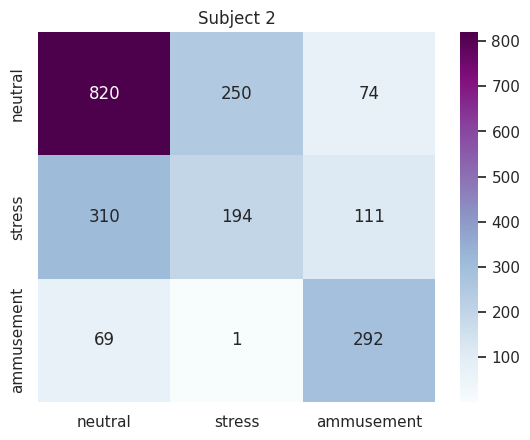

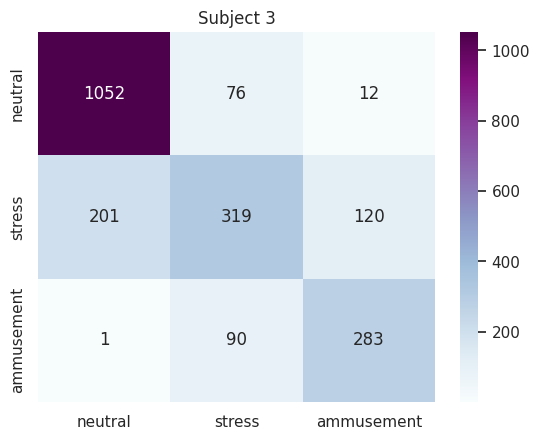

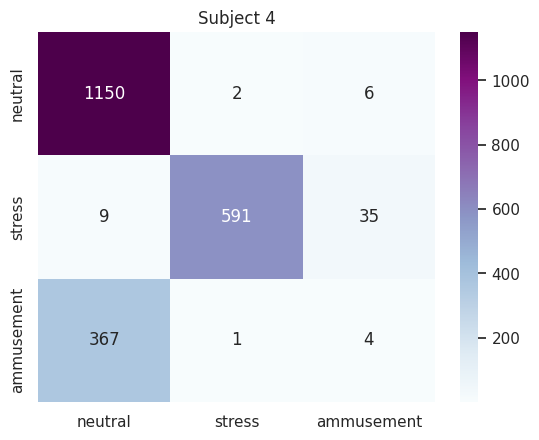

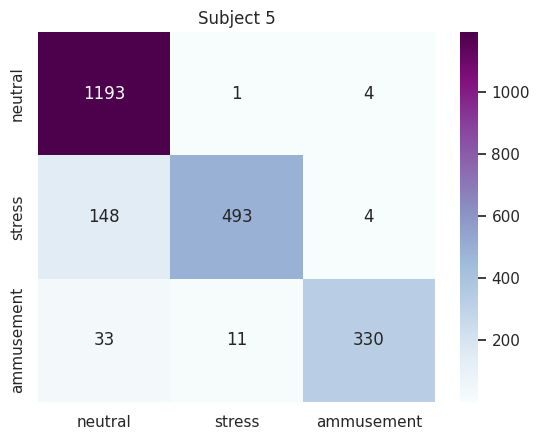

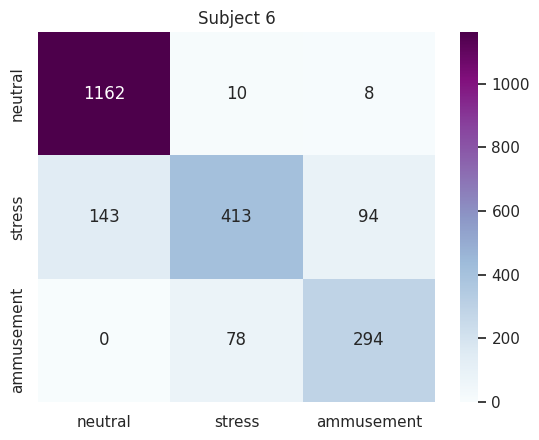

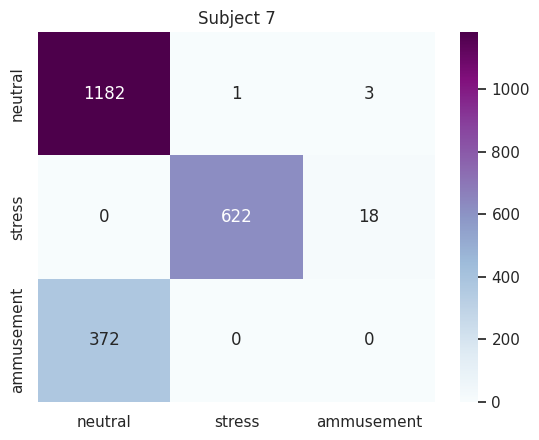

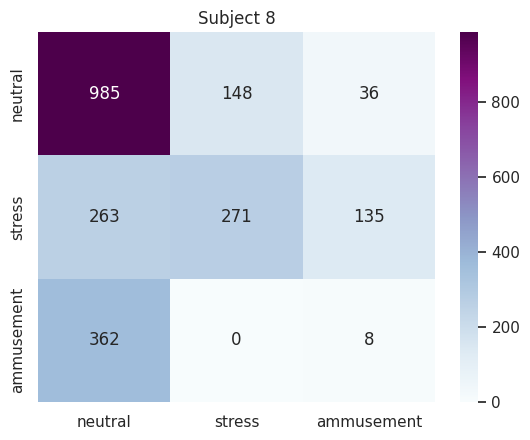

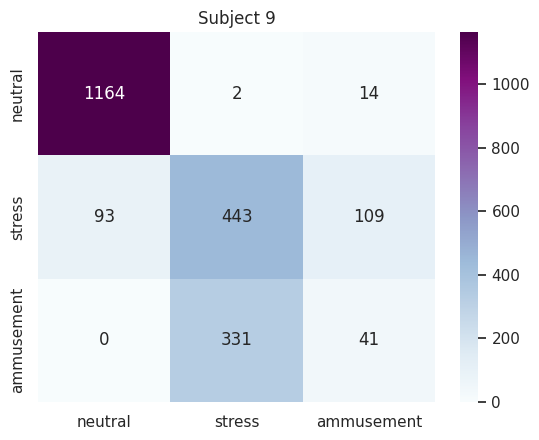

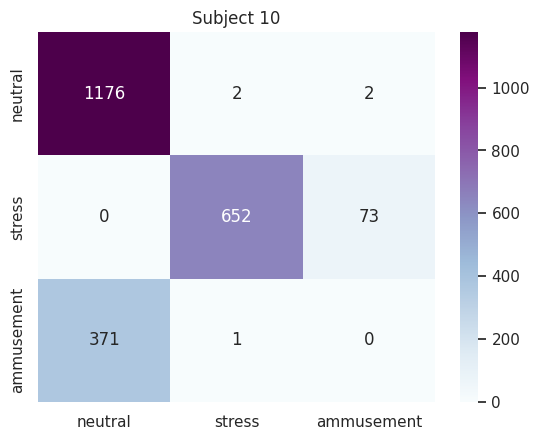

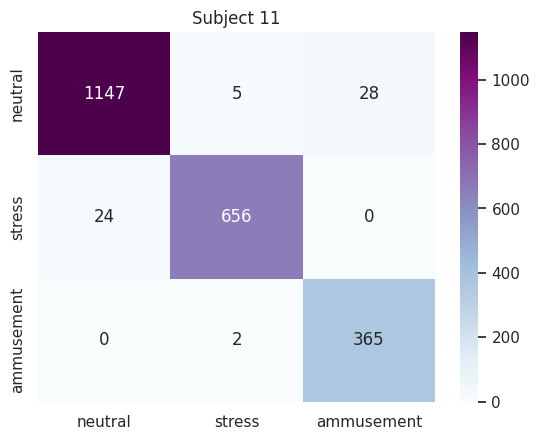

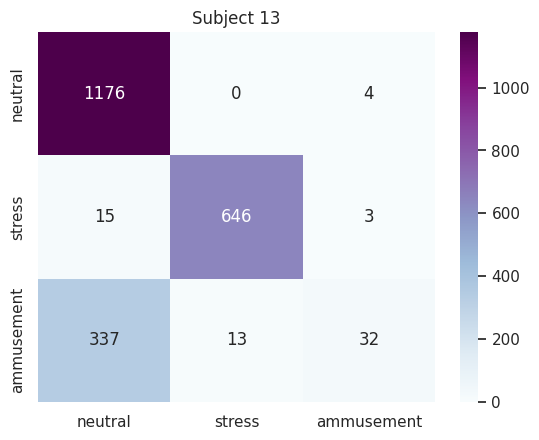

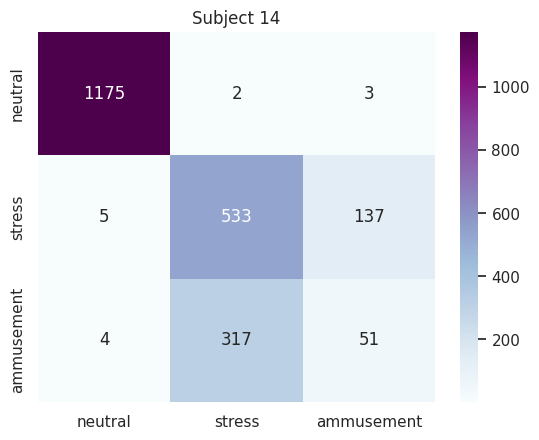

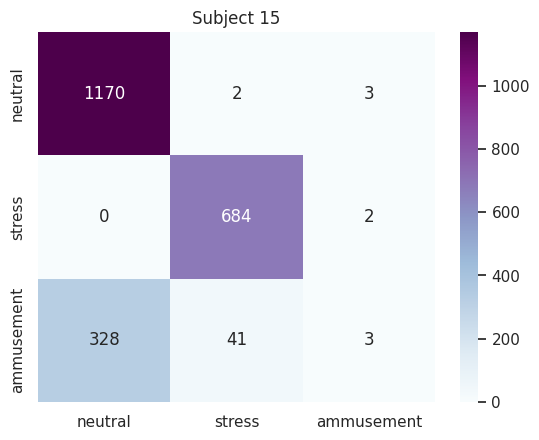

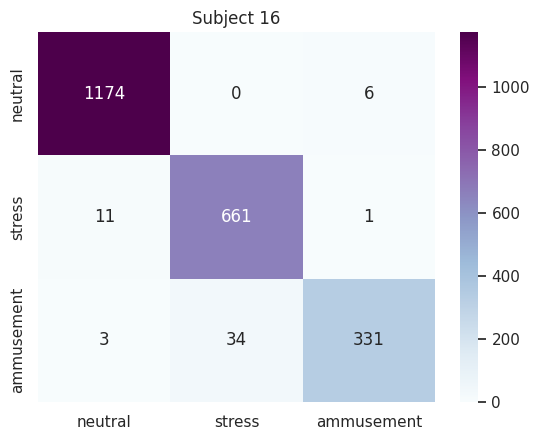

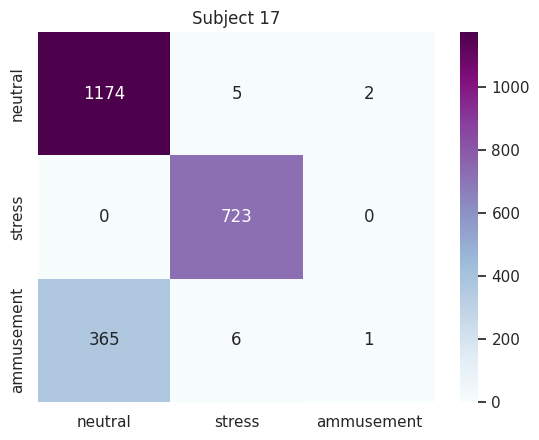

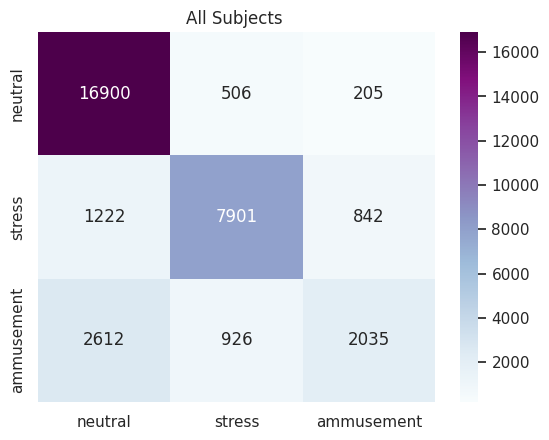

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_c)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()

df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Wrist only physio modalities classification

In [26]:
# use wrist only features for classification
scores_w = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/test/feat_loso" + str(sid) + ".pkl"))

    y = feat[:,-1]
    x = feat[:,80:-1]
    x = StandardScaler().fit_transform(x)

    y_test = feat_test[:,-1]
    x_test = feat_test[:,80:-1]
    x_test = StandardScaler().fit_transform(x_test)

    clf = SVC()
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_w.append([sid, acc, precision, recall, f1])
    cms.append(cm)

subject  2
accuracy:  0.8321546440358322
f1 score:  0.8065680762056393

subject  3
accuracy:  0.6680594243268339
f1 score:  0.6499210600806731



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


subject  4
accuracy:  0.8235565819861432
f1 score:  0.7498858664886837

subject  5
accuracy:  0.7370320252593595
f1 score:  0.7086599384670534

subject  6
accuracy:  0.857402361489555
f1 score:  0.8584332505872212

subject  7
accuracy:  0.7529572338489536
f1 score:  0.6994067950479995

subject  8
accuracy:  0.8016304347826086
f1 score:  0.7317583867104396

subject  9
accuracy:  0.9726900318616295
f1 score:  0.9723967158564284

subject  10
accuracy:  0.6469038208168643
f1 score:  0.6501762797052653

subject  11
accuracy:  0.6892680736416704
f1 score:  0.6707940618258105

subject  13
accuracy:  0.7987421383647799
f1 score:  0.7280343060851319

subject  14
accuracy:  0.5981140547822182
f1 score:  0.5361157066023736

subject  15
accuracy:  0.5848634124496194
f1 score:  0.6004794428591281

subject  16
accuracy:  0.8523187753264295
f1 score:  0.8536997351966517

subject  17
accuracy:  0.45957820738137084
f1 score:  0.39770608909945937



In [27]:
np.array(scores_w)[:,1].mean() #accuracy

np.float64(0.738351414690258)

In [28]:
np.array(scores_w)[:,1].std()

np.float64(0.12718856643717638)

In [29]:
np.array(scores_w)[:,2].mean() #precision

np.float64(0.6921073365678807)

In [30]:
np.array(scores_w)[:,2].std()

np.float64(0.14460428806433406)

In [31]:
np.array(scores_w)[:,3].mean() #recall

np.float64(0.738351414690258)

In [32]:
np.array(scores_w)[:,3].std()

np.float64(0.12718856643717638)

In [33]:
np.array(scores_w)[:,4].mean() #f1-score

np.float64(0.7076023807211972)

In [34]:
np.array(scores_w)[:,4].std()

np.float64(0.13460070615435393)

### Confusion Matrices per subject and for all subjects combined

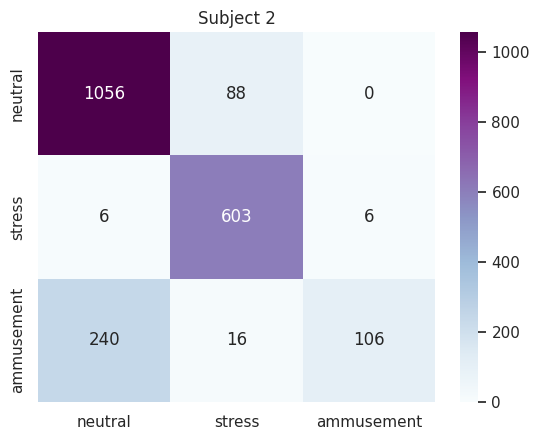

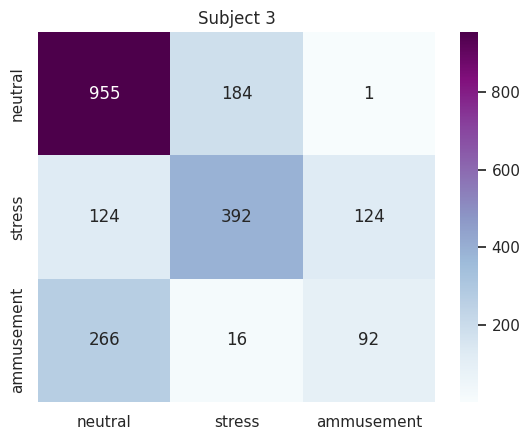

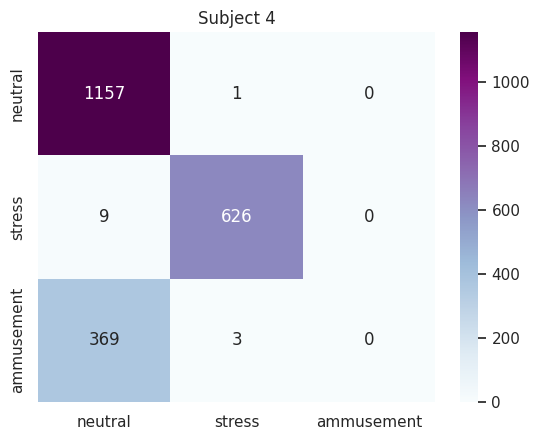

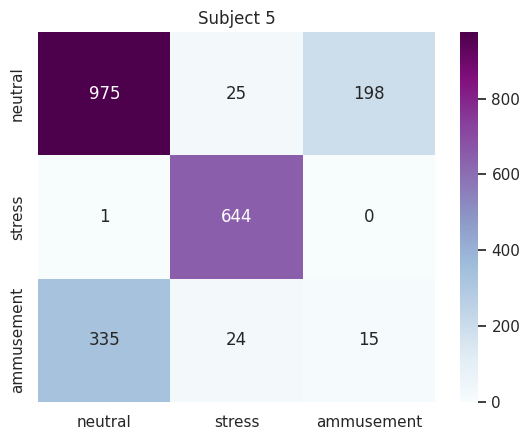

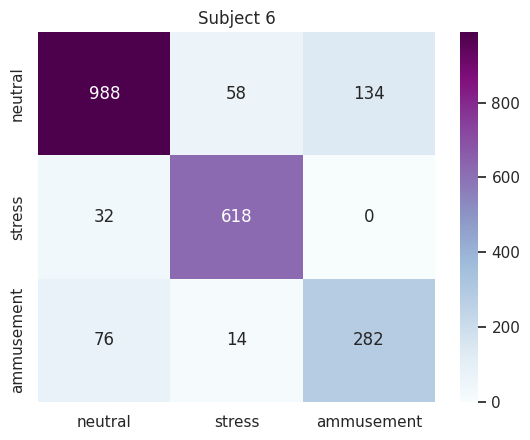

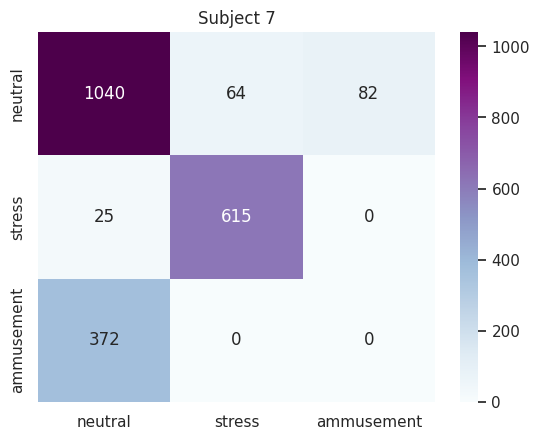

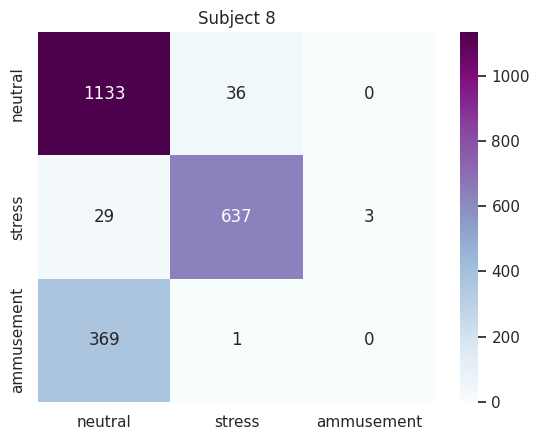

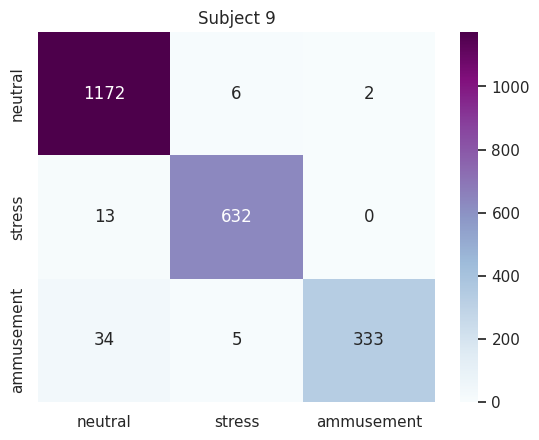

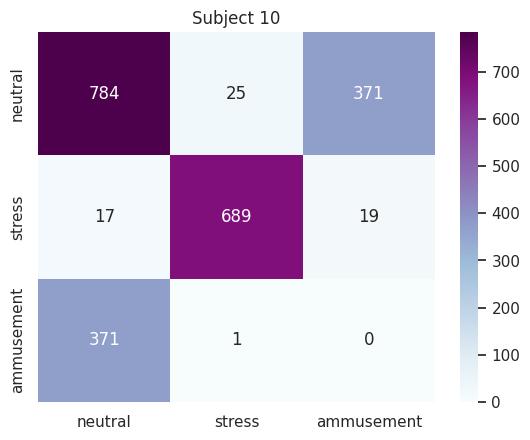

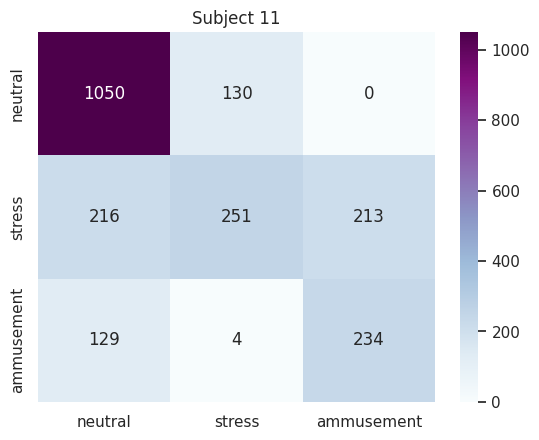

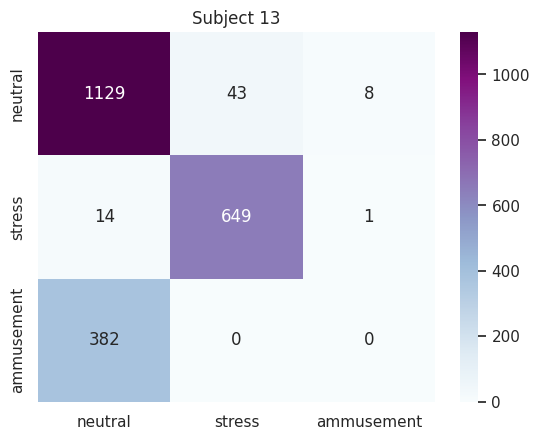

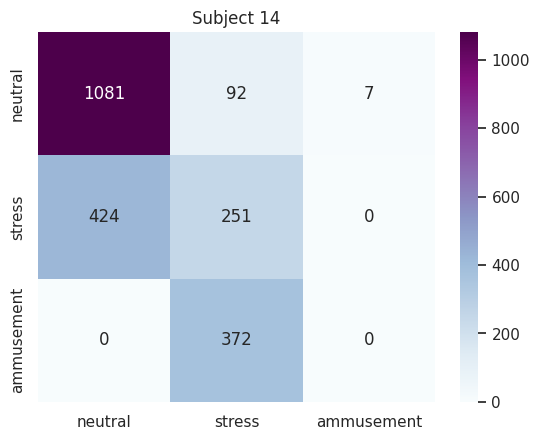

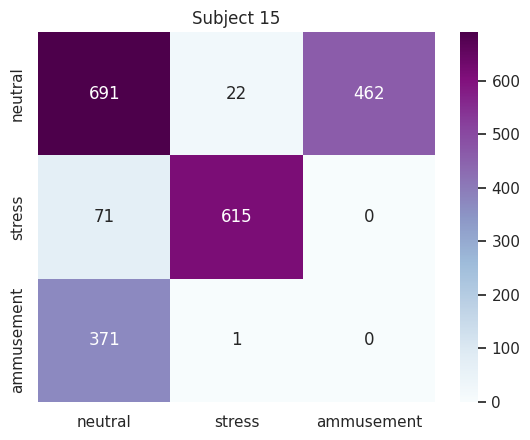

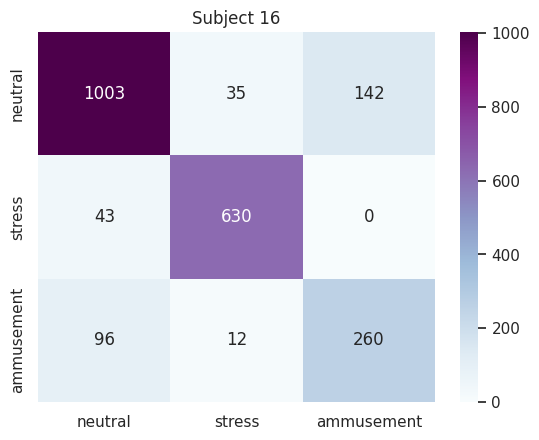

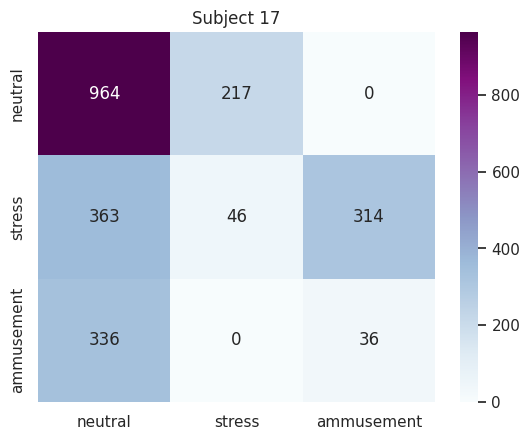

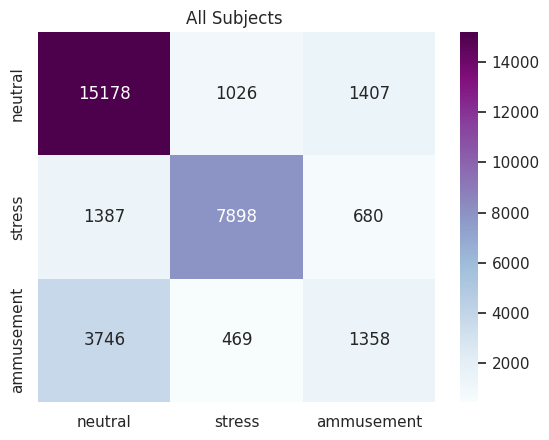

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_w)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()

df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Accuracies plot

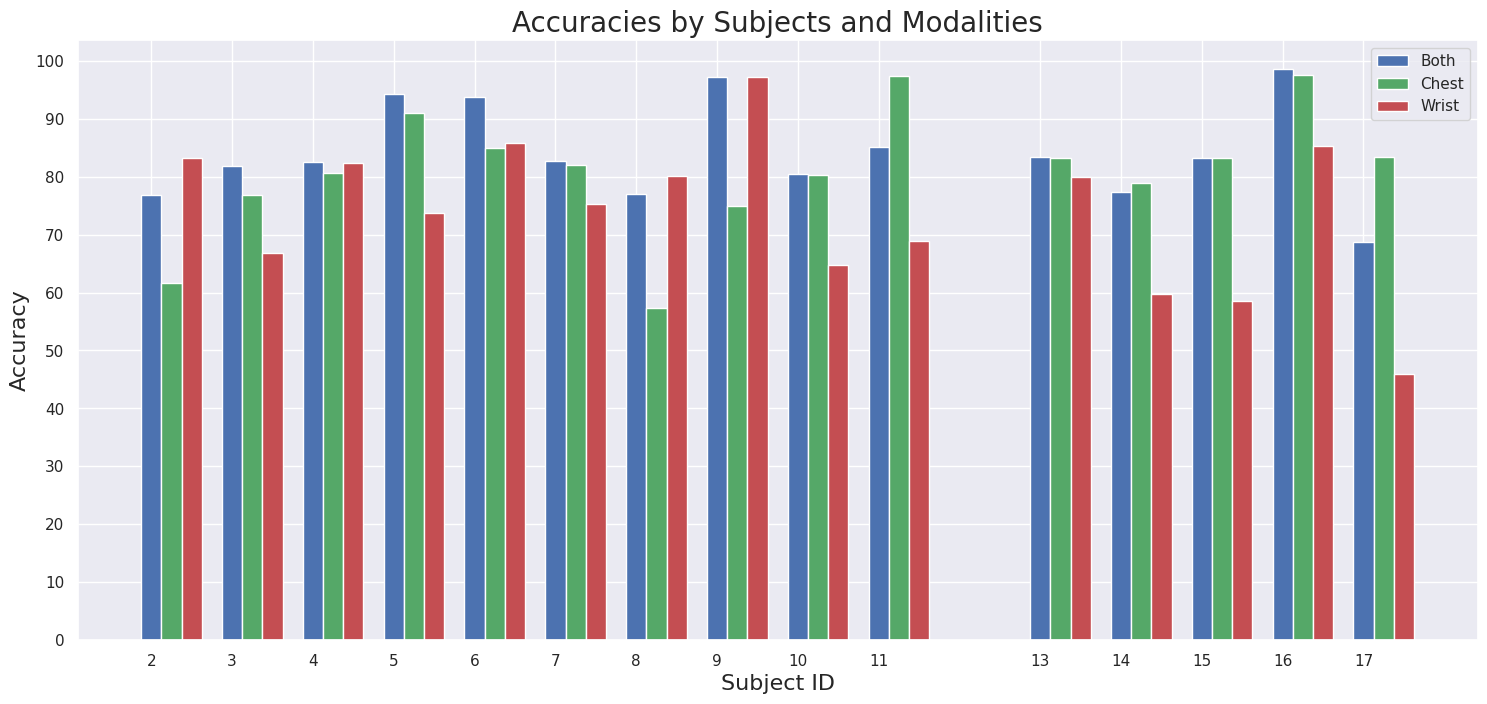

In [36]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("Accuracies by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,1]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,1]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,1]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])


## F1-score plot

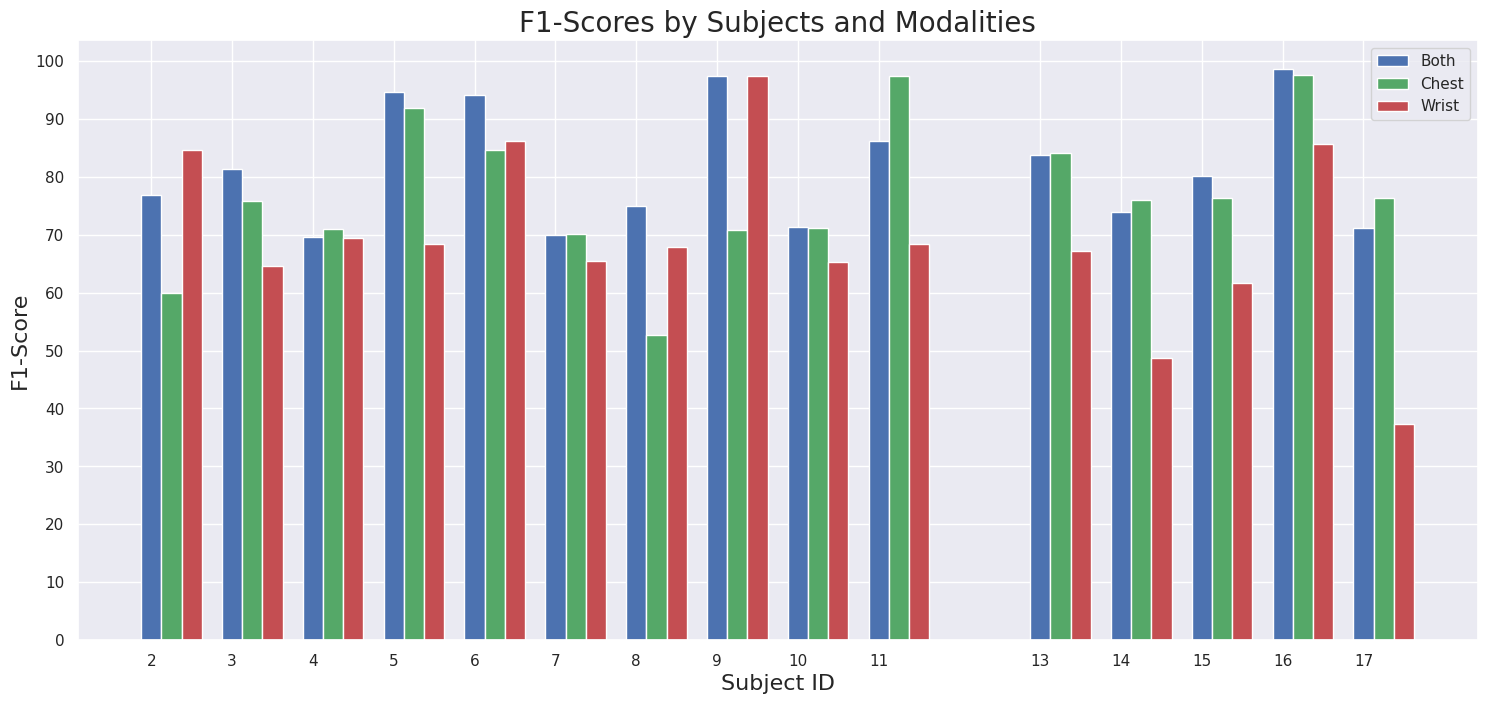

In [37]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('F1-Score', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("F1-Scores by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,2]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,2]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,2]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])